In [21]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [22]:
image_dir = './images'
image_files = [f for f in os.listdir(image_dir) if f.startswith('img') and f.endswith('.jpg')]
output_dir = './filtered-images'
os.makedirs(output_dir, exist_ok=True)

In [23]:
def filtro_gabor(orientacao, frequencia=0.6):
    theta = orientacao * np.pi / 180  # converte para radianos
    kernel = cv2.getGaborKernel((21, 21), 4.0, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
    return kernel

orientacoes = [0, 45, 90, 135]  # horizontal, 45°, vertical, 135°
filtros = [filtro_gabor(o) for o in orientacoes]


In [24]:
def aplicar_filtros_em_escalas(img, filtros, escalas=[1.0, 0.5, 0.25]):
    respostas = []
    for escala in escalas:
        img_redimensionada = cv2.resize(img, None, fx=escala, fy=escala)
        for k in filtros:
            resposta = cv2.filter2D(img_redimensionada, cv2.CV_32F, k)
            resposta_redimensionada = cv2.resize(resposta, (img.shape[1], img.shape[0]))
            respostas.append(resposta_redimensionada)
    return np.stack(respostas, axis=-1)  # resultado com múltiplas bandas


Imagem segmentada salva: ./filtered-images/img7_segmentada.png
Imagem segmentada salva: ./filtered-images/img9_segmentada.png
Imagem segmentada salva: ./filtered-images/img8_segmentada.png
Imagem segmentada salva: ./filtered-images/img11_segmentada.png
Imagem segmentada salva: ./filtered-images/img15_segmentada.png
Imagem segmentada salva: ./filtered-images/img14_segmentada.png
Imagem segmentada salva: ./filtered-images/img12_segmentada.png
Imagem segmentada salva: ./filtered-images/img10_segmentada.png
Imagem segmentada salva: ./filtered-images/img2_segmentada.png
Imagem segmentada salva: ./filtered-images/img4_segmentada.png
Imagem segmentada salva: ./filtered-images/img1_segmentada.png
Imagem segmentada salva: ./filtered-images/img13_segmentada.png
Imagem segmentada salva: ./filtered-images/img3_segmentada.png
Imagem segmentada salva: ./filtered-images/img6_segmentada.png
Imagem segmentada salva: ./filtered-images/img5_segmentada.png
Imagem segmentada salva: ./filtered-images/img16_

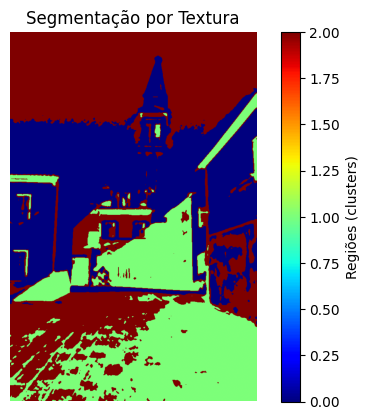

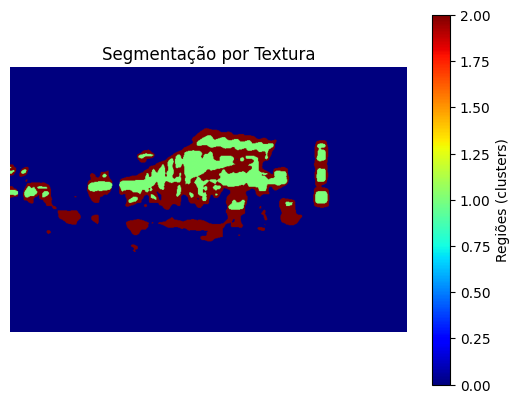

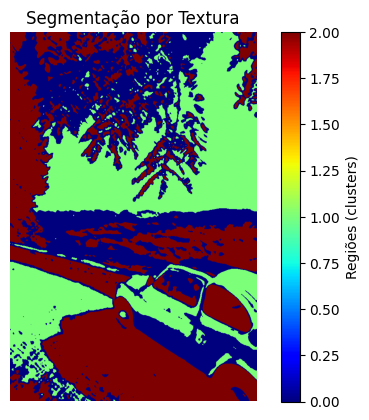

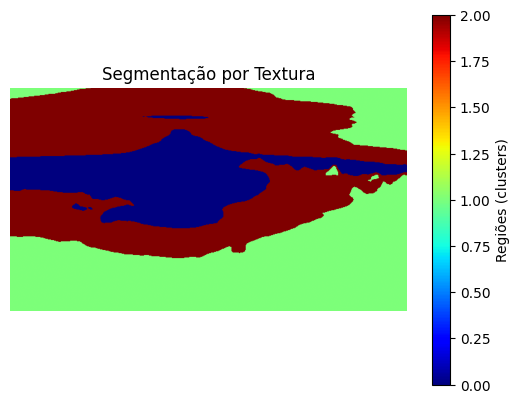

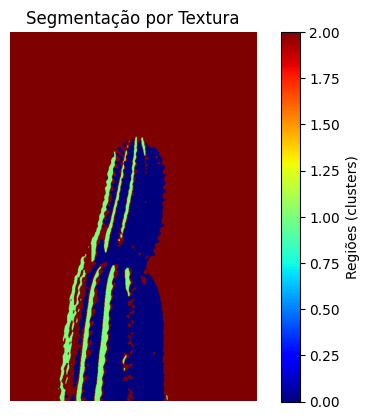

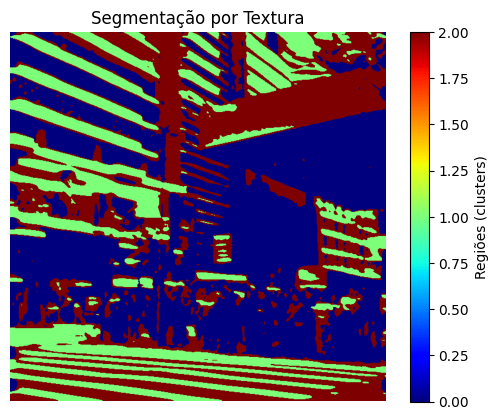

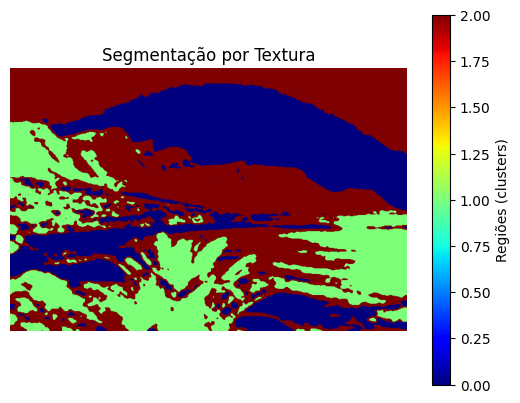

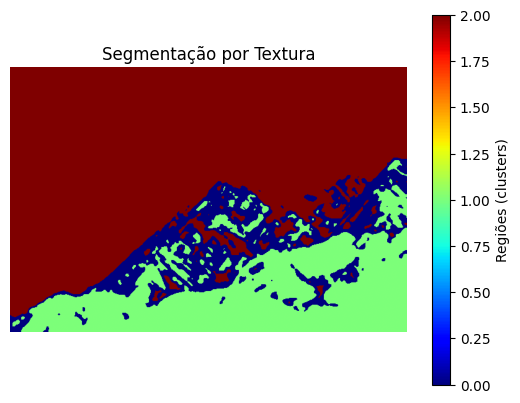

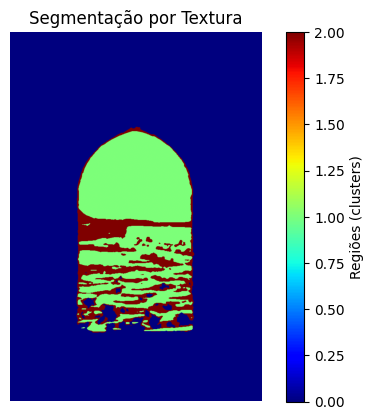

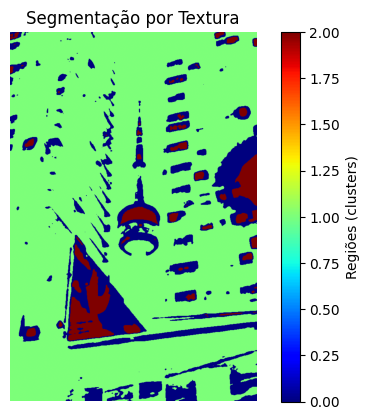

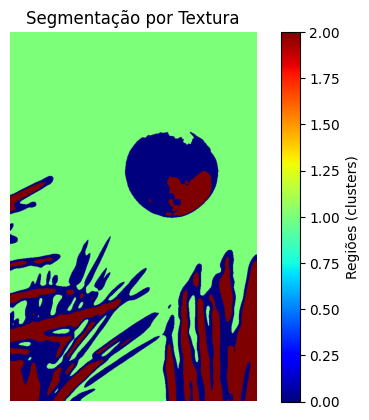

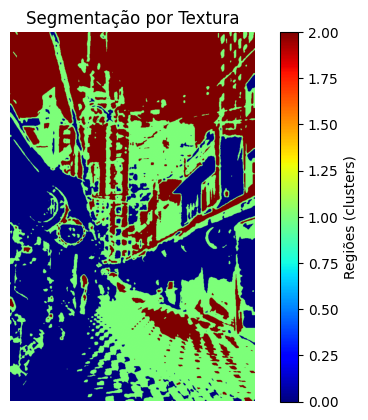

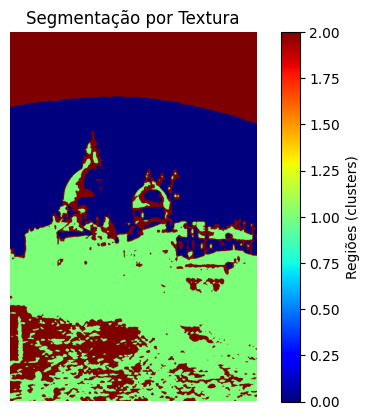

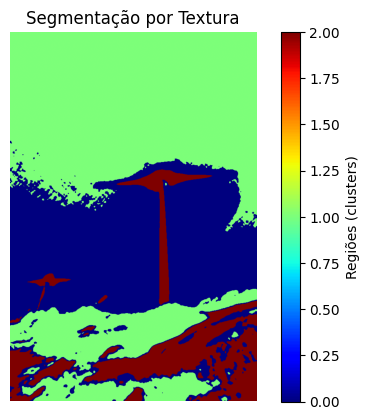

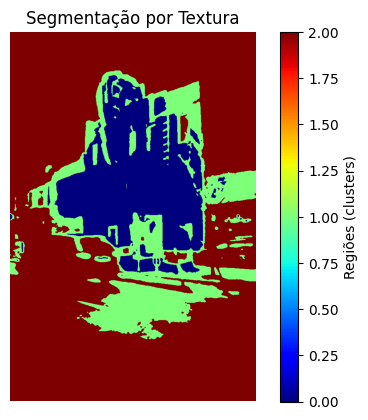

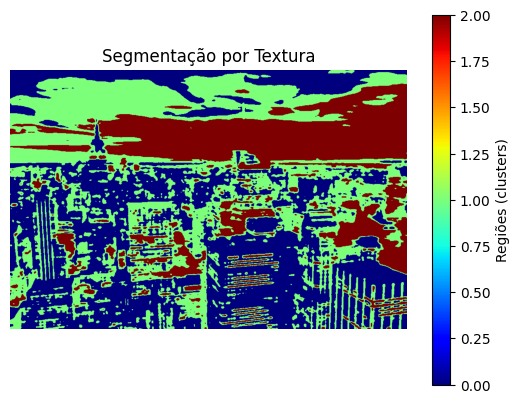

In [25]:
from sklearn.cluster import KMeans



for image_file in image_files:
    img_path = os.path.join(image_dir, image_file)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Carrega a imagem em tons de cinza
    
    if img is None:
        print(f"Erro ao carregar a imagem: {img_path}")
        continue

    # Aplica os filtros
    textura_features = aplicar_filtros_em_escalas(img, filtros)
    
    h, w, d = textura_features.shape
    pixels = textura_features.reshape(-1, d)

    kmeans = KMeans(n_clusters=3, random_state=42).fit(pixels)
    segmentada = kmeans.labels_.reshape(h, w)
    
    plt.figure()
    plt.imshow(segmentada, cmap='jet')
    plt.title('Segmentação por Textura')
    plt.axis('off')
    cbar = plt.colorbar()
    cbar.set_label('Regiões (clusters)')

    # Salva a imagem gerada
    output_path = os.path.join(output_dir, f"{os.path.splitext(image_file)[0]}_segmentada.png")
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    print(f"Imagem segmentada salva: {output_path}")

        
print("Processamento concluído. Imagens filtradas salvas em './filtered-images'.")